In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
print(sns.__version__)

0.10.1


In [446]:
# プロット用データ
df_titanic = sns.load_dataset("titanic")  #タイタニック号の生死者データ
df_tips = sns.load_dataset("tips")  # お店の食事時間と会計総額とチップの関係のデータ
df_iris = sns.load_dataset("iris")  # アヤメの統計データ
df_anscombe = sns.load_dataset("anscombe")
df_fmri = sns.load_dataset("fmri")
df_flights = sns.load_dataset('flights')
df_att = sns.load_dataset("attention")

# matplotlibオブジェクト

In [63]:
"""
・seabornのプロット関数はfigureレベルとaxesレベルの2種類に分けられる。
・***Gridオブジェクト：figureレベル関数の返り値。複数のグラフを扱うためのオブジェクト。
[figure関数]    [返り値]
catplot    ->  FacetGrid  # いろいろ
jointplot  ->  JointGrid  # 密度分布
pairplot   ->  PairGrid   # 散布図行列
lmplot     ->  FacetGrid  # 回帰用
relplot    ->  FacetGrid  # lmplotの低レベルversion
clustermap ->  ClusterGrid
"""
print()

<class 'seaborn.axisgrid.FacetGrid'>
<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>
<class 'list'>
True


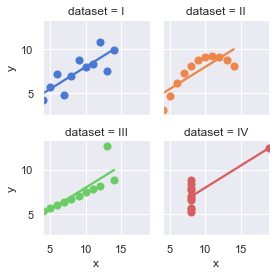

In [328]:
"""figureレベル関数について
figureレベル関数はmatplotlibのFigureオブジェクトとAxesオブジェクトを使用する。
各オブジェクトはGridオブジェクトの「fig」属性と「axes」属性に保持されている。
"""
grid = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df_anscombe,
                  col_wrap=2, ci=None, palette="muted", height=2,
                  scatter_kws={"s": 50, "alpha": 1})

print(type(grid))  # <class 'seaborn.axisgrid.FacetGrid'>
print(type(grid.fig))  # <class 'matplotlib.figure.Figure'>

print(type(grid.axes))  # <class 'numpy.ndarray'>
print(type(grid.fig.axes))  # <class 'list'>

print(id(grid.fig.axes[0]) == id(grid.axes[0]))  # True

<class 'matplotlib.axes._subplots.AxesSubplot'>
True
True


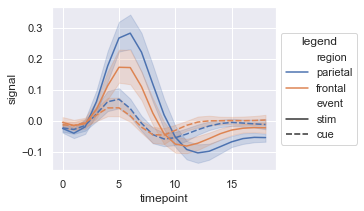

In [520]:
"""axesレベル関数について"""
plt.figure(figsize=(4, 3))
ax = sns.lineplot(x="timepoint", y="signal",
                  hue="region", style="event",
                  data=df_fmri)
ax.legend(title='legend', 
          loc='center left', bbox_to_anchor=(1., .5), 
          facecolor='w'
         )
print(type(ax))  # <class 'matplotlib.axes._subplots.AxesSubplot'>
print(id(ax) == id(plt.gca()))  # True
print(id(ax.figure) == id(plt.gcf()))  # True

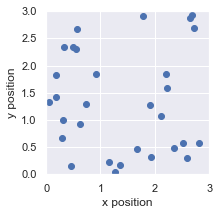

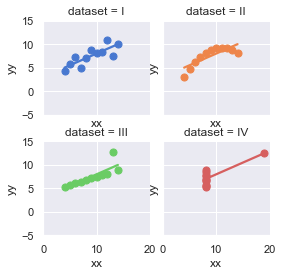

In [74]:
"""FacetGrid、PairGrid、ClusterGridで使える共通のsetメソッド"""
# matplotlibの例
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
ax.scatter(3*np.random.rand(30), 3*np.random.rand(30))
#
ax.set(ylim=(0,3), ylabel='y position', xlim=(0,3), xlabel='x position', aspect='equal')
# 上記は以下と同じ
# ax.set_ylim((0,3))
# ax.set_ylabel('y position')
# ax.set_xlim((0,3))
# ax.set_xlabel('x position')
# ax.set_aspect('equal')

# seabornでの設定例
grid = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df_anscombe,
                  col_wrap=2, ci=None, palette="muted", height=2,
                  scatter_kws={"s": 50, "alpha": 1})
grid.set(xlabel='xx', ylabel='yy')  # ->すべてのAxesに対しいて適用されてしまうので使用ないほうがいい
grid.set(ylim=(-5,15), xlim=(0,20))

## FacetGridの設定例

In [548]:
"""FacetGridのメソッド
[メソッド] [説明]
set_axis_labels([x_var, y_var])    ：左端と下端のラベルを設定
set_xlabels([label])               ：下端のラベルのみ設定
set_ylabels([label])               ：左端のラベルのみ設定
set_titles([template, row_template, …])
                                   ：全てのAxesの上部またはグリッド上部や右側に列や行のカテゴリや
                                   　値を示すタイトルを設定
set_xticklabels([labels, step])    ：下端の数字ラベルを設定
set_yticklabels([labels])          ：左端の数字ラベルを設定
"""
print()

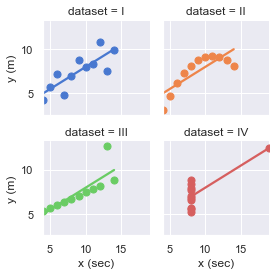

In [549]:
"""FacetGridのメソッド
set_*labels, set_axis_labelsの例
"""
grid = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df_anscombe,
                  col_wrap=2, ci=None, palette="muted", height=2,
                  scatter_kws={"s": 50, "alpha": 1})
grid.set_xlabels('x (sec)').set_ylabels('y (m)')
# grid.set_axis_labels(x_var="x (sec)", y_var="y (m)")  # これでもいい

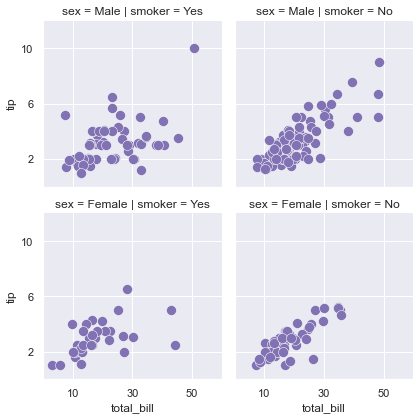

In [550]:
"""FacetGridのメソッド
set_titlesの設定1(デフォルト)
"""
kws = dict(s=100, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(df_tips, col="smoker", row="sex")
g = g.map(plt.scatter, "total_bill", "tip", color="m", **kws)
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])

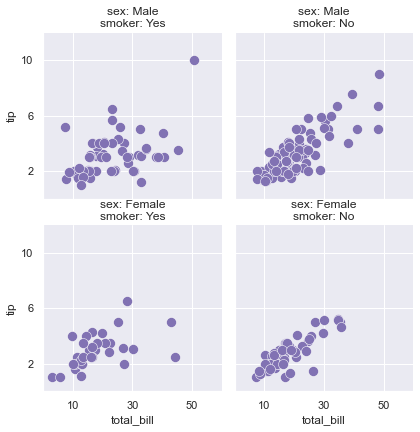

In [551]:
"""FacetGridのメソッド
set_titlesの設定例1
"""
kws = dict(s=100, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(df_tips, col="smoker", row="sex")
g = g.map(plt.scatter, "total_bill", "tip", color="m", **kws)
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.set_titles(template='{row_var}: {row_name}\n{col_var}: {col_name}')

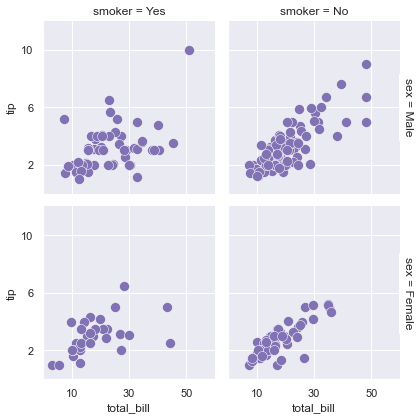

In [552]:
"""FacetGridのメソッド
set_titlesの設定2(デフォルト)
"""
kws = dict(s=100, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(df_tips, col="smoker", row="sex", margin_titles=True)  # ->Trueにする
g = g.map(plt.scatter, "total_bill", "tip", color="m", **kws)
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])

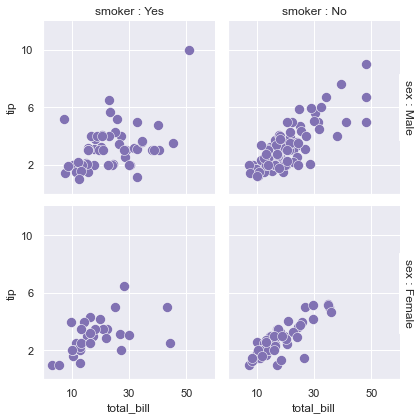

In [553]:
"""FacetGridのメソッド
set_titlesの設定例2
"""
kws = dict(s=100, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(df_tips, col="smoker", row="sex", margin_titles=True)  # ->Trueにする
g = g.map(plt.scatter, "total_bill", "tip", color="m", **kws)
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.set_titles(row_template='{row_var} : {row_name}', col_template='{col_var} : {col_name}')

## JointGridの設定例

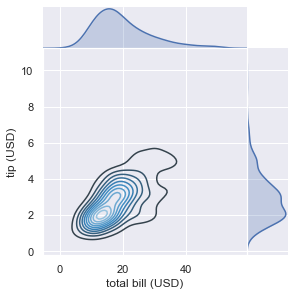

In [554]:
"""JointGridのメソッド
set_axis_labelsの設定例
"""
g = sns.JointGrid(x="total_bill", y="tip", data=df_tips, space=0)
g.plot_joint(sns.kdeplot, cmap="Blues_d")
g.plot_marginals(sns.kdeplot, shade=True)
g.fig.set_size_inches((4,4))
g.set_axis_labels('total bill (USD)', 'tip (USD)')

# 画像サイズの設定

In [80]:
"""

以下はmatplotlibでのやり方の例。
snsでも使用できるが、一部のplot関数ではaxesレベル関数で変更ができない模様。

# 方法1
plt.figure(figsize=(20, 10))
sns.scatterplot(...)

# 方法2
plt.rcParams["figure.figsize"] = (20, 10)
sns.scatterplot(...)

# 方法3
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(..., ax=ax)
"""
print()

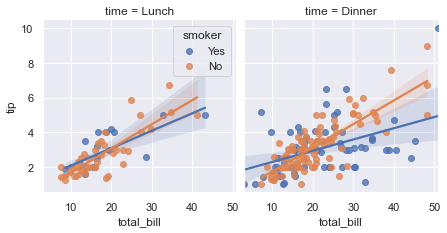

In [81]:
"""figureレベル関数で設定1"""
grid = sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker",
                  data=df_tips, legend_out=False)
grid.fig.set_size_inches((6, 3))
# もう一つの設定方法
# grid.fig.set_figwidth(6)
# grid.fig.set_figheight(3)

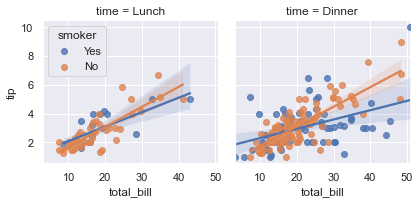

In [82]:
"""figureレベル関数で設定2"""
grid = sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker",
                  data=df_tips, legend_out=False, height=3, aspect=1)

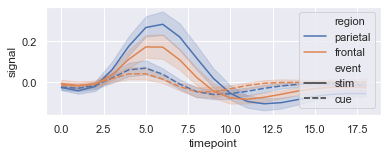

In [83]:
"""axesレベル関数で設定(axを渡す場合)"""
fig, ax = plt.subplots(figsize=(6, 2))  # ->Figure全体のサイズ設定になる
sns.lineplot(x="timepoint", y="signal", hue="region", style="event",data=df_fmri, ax=ax)

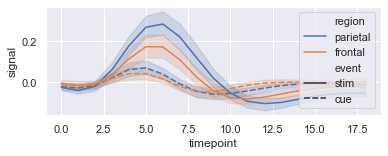

In [84]:
"""axesレベル関数で設定(axを渡さない場合)"""
plt.figure(figsize=(6, 2))  # ->Figure全体のサイズ設定になる
ax = sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=df_fmri)

# タイトルと軸ラベルの設定

In [40]:
"""
FacetGridでは設定に制限がある。
matplotlibのFigureやAxesにアクセスすれば、自由に設定可能。
"""
print()

AxesSubplot(0.169132,0.161319;0.370434x0.325729)
AxesSubplot(0.584566,0.161319;0.370434x0.325729)


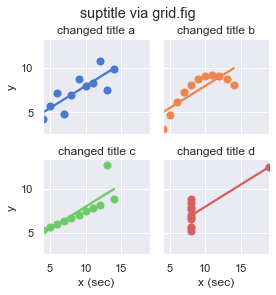

In [87]:
# figureレベル関数の例
grid = sns.lmplot(x="x", y="y", col='dataset', hue='dataset', data=df_anscombe,
                  col_wrap=2, ci=None, palette='muted', height=2,
                  scatter_kws={'s': 50, 'alpha': 1})
grid.fig.suptitle('suptitle via grid.fig', y=1.02)  # 図全体のタイトル

for ax, title in zip(grid.axes.tolist(), ['a', 'b', 'c', 'd']):
    ax.set_title(f'changed title {title}')

for ax in grid._bottom_axes: # 下端のAxesだけにアクセスできるプライベート変数を使う場合
    ax.set_xlabel("x (sec)")
for ax in grid.axes[2:]:  # axesを直接指定して設定
    print(ax)

Text(0, 0.5, 'ylabel')

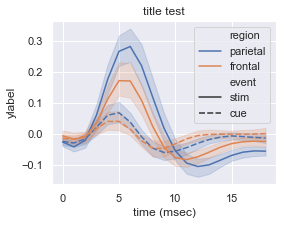

In [88]:
"""axを渡す場合はaxに直接指定できる"""
plt.figure(figsize=(4, 3))
ax = sns.lineplot(x="timepoint", y="signal",
                  hue='region', style='event',
                  data=df_fmri)
ax.set_title("title test")
ax.set_xlabel("time (msec)")
ax.set_ylabel("ylabel")

# FacetGridを利用したプロット例

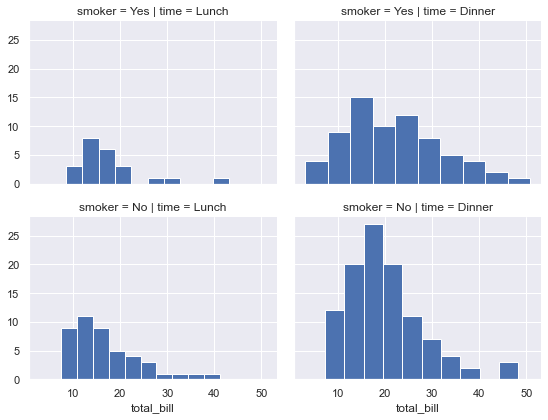

In [469]:
"""基本的なプロット例1"""
grid = sns.FacetGrid(tips, col="time",  row="smoker")
grid = grid.map(plt.hist, "total_bill")
grid.fig.set_size_inches((8, 6))

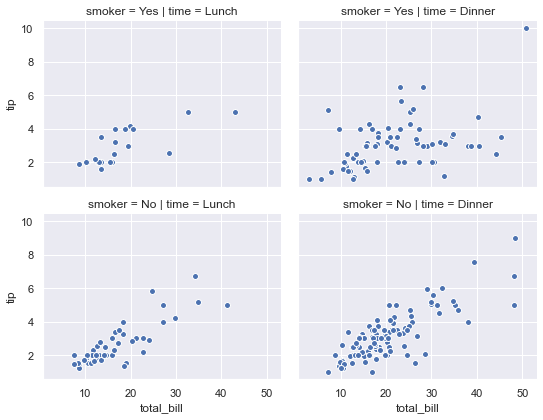

In [470]:
"""基本的なプロット例2"""
grid = sns.FacetGrid(tips, col="time",  row="smoker")
grid = grid.map(plt.scatter, "total_bill", "tip", edgecolor="w")
grid.fig.set_size_inches((8, 6))

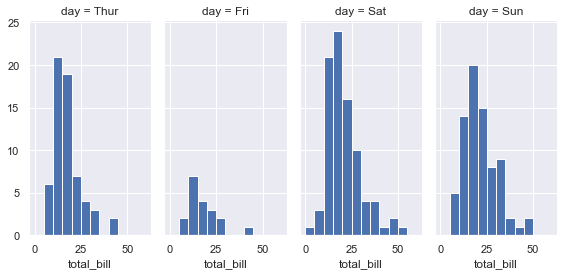

In [425]:
"""基本的なプロット例3"""
bins = np.arange(0, 65, 5)
grid = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
grid = grid.map(plt.hist, "total_bill", bins=bins)
grid.fig.set_size_inches((8, 4))

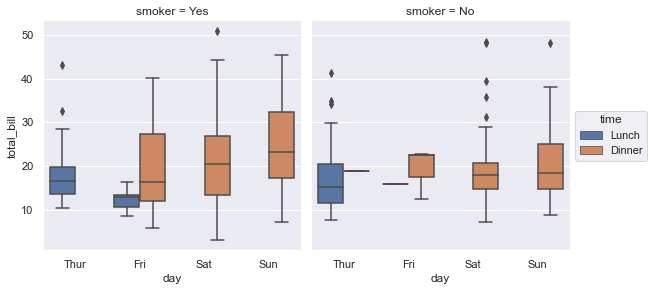

In [571]:
"""legendの位置設定

方法1
legend=Falseにして、grid.fig.axes[{表示したいプロットの番号}].legendで設定し直す。
方法2
legend=Falseにして、plt.legendで設定し直す。

"""
grid = sns.catplot(x="day", y="total_bill", data=df_tips.sort_values('size'), 
                   kind="box", hue="time", col="smoker", legend=False)
grid.fig.set_size_inches((8, 4))
grid.fig.axes[1].legend(title='time', loc='center left', bbox_to_anchor=(1., .5))
# plt.legend(loc='center left', bbox_to_anchor=(1., .5))

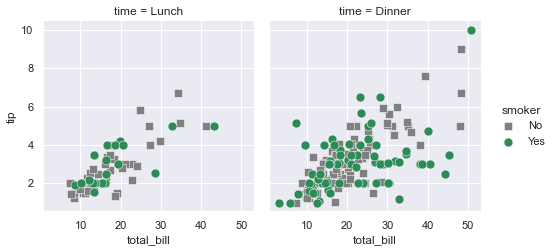

In [496]:
"""legendの表示 ＆ 設定値をdictで渡す"""
kws = dict(s=80, linewidth=.5, edgecolor="w")
pal = dict(Yes="seagreen", No="gray")  # ラベルごとに色を設定
grid = sns.FacetGrid(tips, col="time", palette=pal, 
                     hue="smoker", hue_order=["No", "Yes"], 
                     hue_kws=dict(marker=["s", "o"]))
grid = grid.map(plt.scatter, "total_bill", "tip", **kws).add_legend()
# 以下のようにしてもOK
# grid = grid.map(plt.scatter, "total_bill", "tip", s=50, linewidth=.5, edgecolor="w").add_legend()
grid.fig.set_size_inches((8, 4))

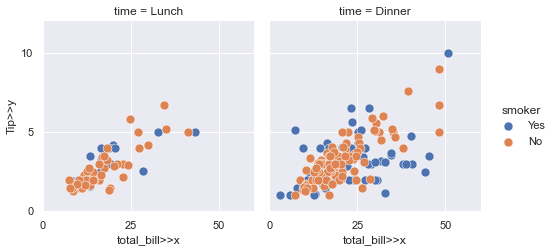

In [526]:
"""ラベル・目盛等の設定"""
grid = sns.FacetGrid(tips, col="time", hue="smoker")
grid = grid.map(plt.scatter, "total_bill", "tip", **kws).add_legend()
grid = grid.set_axis_labels("total_bill>>x", "Tip>>y")
# grid = grid.set(xlabel="total_bill>>x", ylabel="Tip>>y")  # それぞれのプロットに対して表示する
grid = grid.set(xlim=(0, 60), ylim=(0, 12), xticks=[0, 25, 50], yticks=[0, 5, 10])
grid.fig.set_size_inches((8, 4))

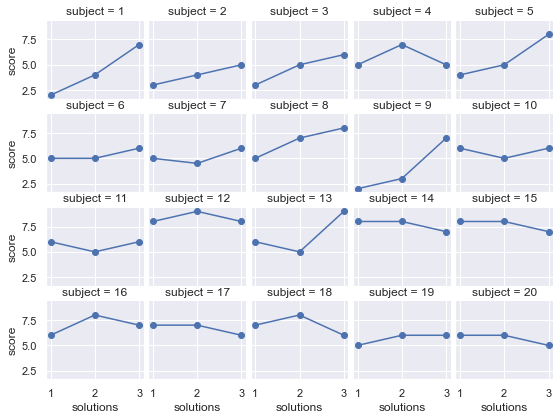

In [491]:
"""タイトル例1 ＆ グラフ間隔の設定"""
grid = sns.FacetGrid(df_att, col="subject", col_wrap=5, height=1.5, aspect=1.)
grid = grid.map(plt.plot, "solutions", "score", marker="o")
grid.fig.set_size_inches((8, 6))
grid.fig.subplots_adjust(wspace=.05, hspace=.2)

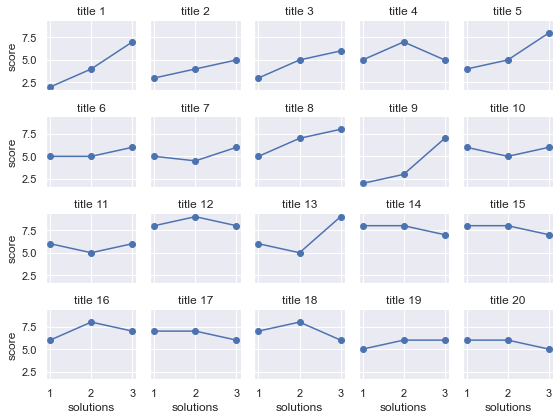

In [528]:
"""タイトル例2"""
grid = sns.FacetGrid(df_att, col="subject", col_wrap=5, height=1.5, aspect=1.)
grid = grid.map(plt.plot, "solutions", "score", marker="o").set_titles("title {col_name}")
grid.fig.set_size_inches((8, 6))

In [499]:
"""保存"""
# grid = sns.FacetGrid(df_att, col="subject", col_wrap=5, height=1.5, aspect=1.)
# grid = grid.map(plt.plot, "solutions", "score", marker="o").set_titles("title {col_name}")
# grid.fig.set_size_inches((8, 6))
# grid.savefig("test.png")

'保存'

# プロット例

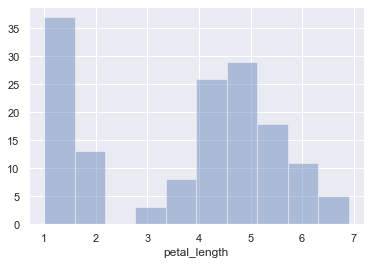

In [89]:
"""ヒストグラム
"""
sns.distplot(df_iris["petal_length"], kde=False, rug=False, bins=10, label="test")

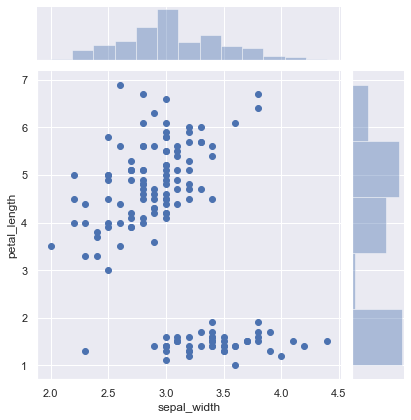

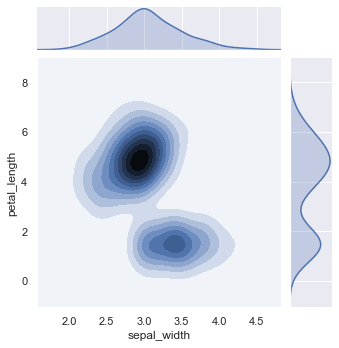

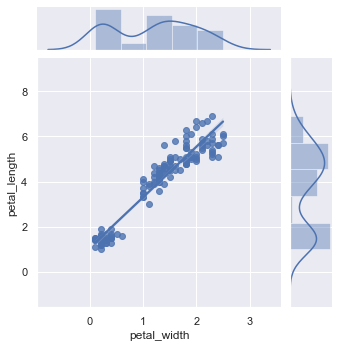

In [90]:
"""散布図
"""
sns.jointplot('sepal_width', 'petal_length', data=df_iris)
sns.jointplot('sepal_width', 'petal_length', data=df_iris, kind='kde', height=5.0)
sns.jointplot('petal_width', 'petal_length', data=df_iris, kind='reg', height=5.0)

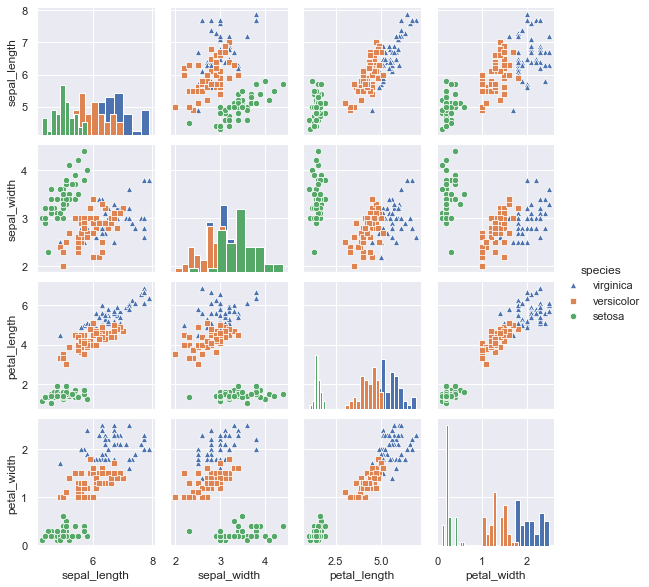

In [224]:
"""散布図行列
hue          ：表示種別の指定。
hue_order    ：hueの順番
kind         ：プロット種類。‘scatter’, ‘reg’から選択。
diag_kind    ：対角表示の設定。‘auto’, ‘hist’, ‘kde’から選択。
vars         ：グラフ化する行列を指定。x_vars, y_varsと共存できない。
"""
grid = sns.pairplot(df_iris, 
                    dropna=True,  # 欠損値の排除
                    markers=['^', 's', 'o'], 
                    hue='species', 
                    hue_order=['virginica', 'versicolor', 'setosa'], 
                    kind='scatter', 
                    diag_kind='hist', 
#                     vars=['sepal_length','sepal_width'], 
#                     x_vars=['sepal_width', 'sepal_length'], 
#                     y_vars=['petal_width', 'petal_length'], 
#                     palette='Greys',  # カラーパレットの指定
                    height=2.,  # 縦幅(インチ)
                    aspect=1,  # 横幅(=height*aspect)
                    plot_kws=dict(s=40, alpha=1.0),  # 
                   )

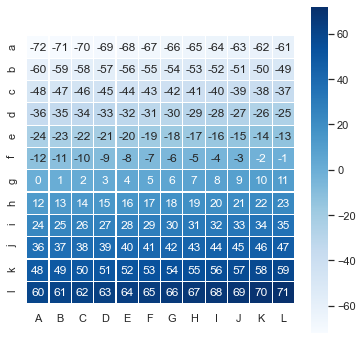

In [413]:
"""ヒートマップ
annot        ：True=数値を表示。
square       ：True=正方形で表示。
linewidths   ：セル間の隙間のサイズ。デフォルトは0。
linecolor    ：セル間の隙間の色。デフォルトは'White'。
cbar         ：True=カラーバー表示・非表示。
vmax         ：カラーバー最大値。
vmin         ：カラーバー最小値。
center       ：カラーバー中央値。
cmap         ：カラーマップの指定。以下は例。末尾に'_r'を付けると色の並び順が逆になる。
             ：'viridis', 'plasma', 'inferno'
             ：'Greys', 'Purples', 'Blues', 'Reds', 'YlOrBr', 'YlGnBu'
             ：'binary', 'winter', 'cool', 'hot'
             ：'PiYG, 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'hsv', 'PuBu', 'BuPu', 'GnBu'
             ：'gnuplot, 'gnuplot2', 'CMRmap', 'brg', 'rainbow', 'jet', 'afmhot'
robust       ：True=(vmin、vmaxが設定されていない場合)
             　極端に大きな値や小さい値の影響を受けないようにカラーバーが設定される。デフォルトはFalse。
fmt          ：(annot=Trueにした場合)出力フォーマットを文字列で指定。デフォルトは'2g'。
xticklabels  ：x軸ラベルの設定。Trueに設定すると列名をすべて表示。Falseに設定すると非表示にする。
             ：整数値を指定=値ごとに出力。リストを指定=任意の文字列を出力。
yticklabels  ：y軸ラベルの設定。xticklabelsと同じ。
mask         ：TrueまたはFalseの2値で構成されるデータフレームまたは、行列でマスクする。
             　欠損値は自動的にマスクされる。デフォルトはNone
"""
idxs = [chr(i) for i in range(97, 109)]
cols = [chr(i) for i in range(65, 77)]
df = pd.DataFrame(np.arange(-72, 72).reshape((12, 12)), index=idxs, columns=cols)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df, annot=True, fmt='g', linewidths=.1, cmap='Blues', 
            vmin=-72, vmax=72, center=0, square=True, 
#             xticklabels=5, yticklabels=2
#             robust=True
           )
plt.show()

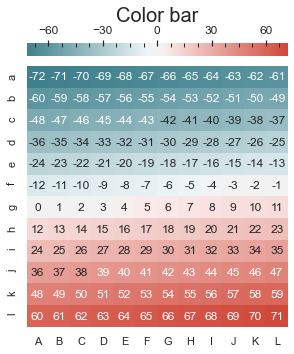

In [400]:
"""ヒートマップ(カラーバーの細かい設定)
cbar_kws     ：(辞書型)パラメータを指定。matplotlibのfig.colorbarを設定する。
以下、cbar_kwsの設定。
label        ：カラーバーのタイトル
location     ：カラーバーの位置を指定。use_gridspec=Falseにする必要あり。
ticks        ：目盛の間隔設定。リスト形式でもよいがMultipleLocatorを推奨。
--------------------
minorticks_on：補助目盛の表示
tick_params  ：目盛の設定。'in', 'out', 'inout'が設定出来る。
set_fontsize ：フォントサイズ。
set_zorder   ：表示順の設定。
--------------------
diverging_palette：分岐カラーパレットの設定。
デフォルトは(h_neg, h_pos, s=75, l=50, sep=10, n=6, center='light', as_cmap=False)
h_neg, h_pos ：パレットの負と正のアンカー色相。設定範囲はfloat：[0, 359]。
s            ：アンカー彩度。[0, 100]。
l            ：明度。[0, 100]。
sep          ：中間領域のサイズ。
n            ：パレットの色の数(as_cmap=Falseの時有効(cmapを返さない場合))。
center       ：パレットの中心の明暗の設定。{'light', 'dark'}。
as_cmap      ：True=色のリストではなく、matplotlibのカラーマップオブジェクトを返す。
"""
from matplotlib.ticker import MultipleLocator
idxs = [chr(i) for i in range(97, 109)]
cols = [chr(i) for i in range(65, 77)]
df = pd.DataFrame(np.arange(-72, 72).reshape((12, 12)), index=idxs, columns=cols)
# 分岐カラーパレットを設定する場合
cmap = sns.diverging_palette(210, 15, sep=15, as_cmap=True)
# プロット
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df, annot=True, fmt='g', cmap=cmap, vmin=-72, vmax=72, center=0, square=True, 
            cbar_kws = dict(use_gridspec=False, location='top',
                            label="Color bar", ticks=MultipleLocator(30)
                           )
           )
# 追加の細かい設定
cax = ax.collections[0].colorbar.ax  # ColorbarオブジェクトからカラーバーのAxesオブジェクトにアクセス
cax.minorticks_on()  # 補助目盛の表示
cax.tick_params(which='minor', direction='in')
cax.tick_params(which='major', direction='inout', labelsize=12)
cax.xaxis.label.set_fontsize(20)  # cbar_kwsのlocationの設定によって'xaxis'か'yaxis'かに変更。
cax.collections[0].set_zorder(0)  # colorbarの色部分を最背面に設定。
# カラーバーの位置(サイズ)設定例
# cax_pos0 = cax.get_position()
x0 = ax.get_position().x0  # 図の左端 x座標(下)
y1 = ax.get_position().y1  # 図の左端 y座標(上)
cax_pos1 = [x0, y1+0.025, x1-x0, 1.]
cax.set_position(cax_pos1)  # [left, bottom, width, height]
#
plt.show()

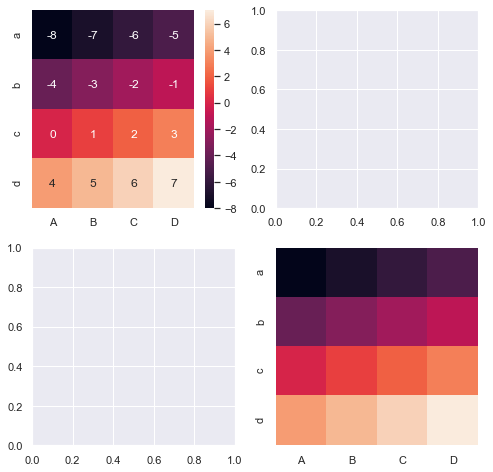

In [133]:
"""ヒートマップ(行列表示)
"""
df = pd.DataFrame(np.arange(-8, 8).reshape((4, 4)), index=['a', 'b', 'c', 'd'], columns=['A', 'B', 'C', 'D'])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
sns.heatmap(df, ax=axes[0, 0], annot=True)
sns.heatmap(df, ax=axes[1, 1], cbar=False)

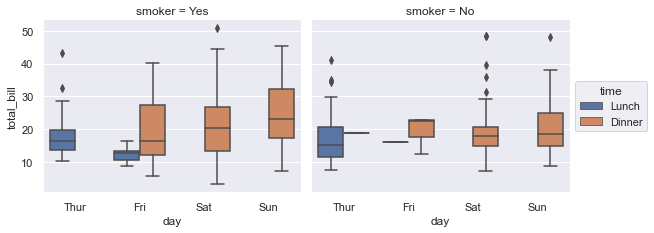

In [574]:
"""箱ひげプロット(catplot)

[Location String]    [Location Code]
'best'	             0
'upper right'	     1
'upper left'	     2
'lower left'	     3
'lower right'	     4
'right'	             5
'center left'	     6
'center right'	     7
'lower center'	     8
'upper center'	     9
'center'	         10

"""
grid = sns.catplot(x="day", y="total_bill", data=df_tips.sort_values('size'), 
                   kind="box", hue="time", col="smoker", legend=False)
grid.fig.set_size_inches((8, 3))
grid.fig.axes[1].legend(title='time', loc='center left', bbox_to_anchor=(1., .5))
# plt.legend(loc='center left', bbox_to_anchor=(1., .5))

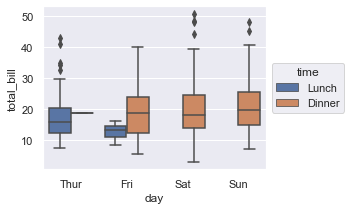

In [537]:
"""箱ひげプロット(boxplot)

boxplotはaxes関数であることに注意

"""
current_palette = sns.color_palette()
plt.figure(figsize=(4, 3))
ax = sns.boxplot(x="day", y="total_bill", data=df_tips.sort_values('size'), 
                 hue="time", 
                 palette=current_palette
                )
ax.legend(title='time', loc='center left', bbox_to_anchor=(1., .5))

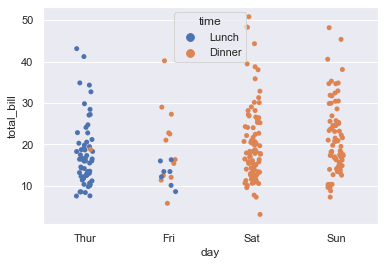

In [94]:
"""分布プロット
"""
sns.stripplot(x="day", y="total_bill", data=df_tips, hue='time')

In [ ]:
"""折れ線プロット
"""

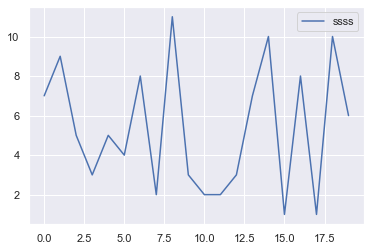

In [117]:
fig = sns.mpl.pyplot.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(20),  [np.random.randint(0, 12) for i in range(20)], label="ssss")
ax.legend()
plt.show()